In [1]:
import numpy as np

In [2]:
class MyLinealRegression:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape
        X_train = np.hstack((np.ones((l, 1)), X))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        return self
    
    def predict(self, X):
        l, n = X.shape
        X_train = np.hstack((np.ones((l, 1)), X))

        y_pread = X_train @ self.w
        return y_pread
    
    def get_weights(self):
        return self.w.copy()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def lineal_regression(x):
    return 5*x + 6

In [5]:
objects_num = 100
X = np.linspace(0, 10, objects_num)
y = lineal_regression(X) + np.random.normal(0, 3, objects_num)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
import matplotlib.pyplot as plt

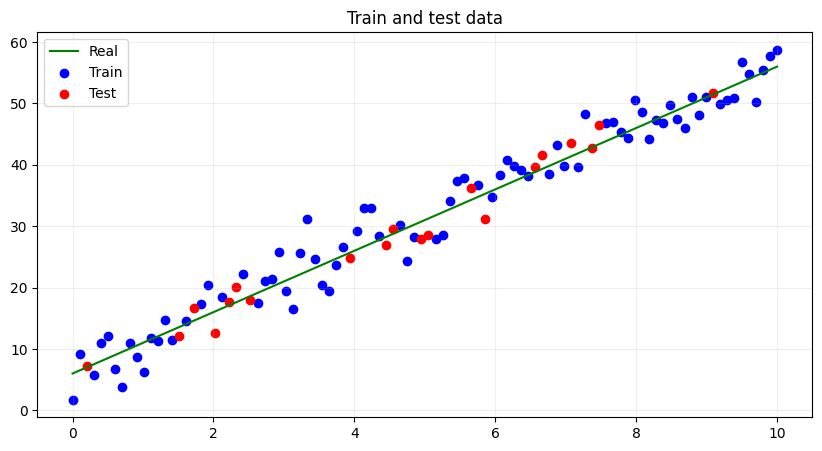

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(X, lineal_regression(X), label='Real', c='g')
plt.scatter(X_train, y_train, label='Train', c='b')
plt.scatter(X_test, y_test, label='Test', c='r')
plt.title('Train and test data')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

### Обучим модель

In [8]:
regressor = MyLinealRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

prediction = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([[6.44616787],
       [5.00330208]])

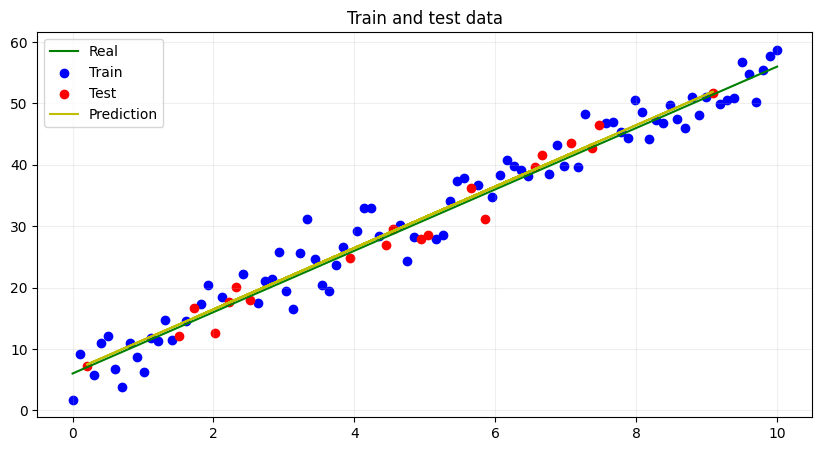

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.plot(X, lineal_regression(X), label='Real', c='g')
plt.scatter(X_train, y_train, label='Train', c='b')
plt.scatter(X_test, y_test, label='Test', c='r')
plt.plot(X_test, prediction, label='Prediction', c='y')
plt.title('Train and test data')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

### Градиентная оптимизация

In [ ]:
class MyGradientLinearRegression(MyLinealRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]
        
        y = y[:, np.newaxis]
        l, n = X.shape
        X_train = np.hstack((np.ones((l, 1)), X))
        
        self.w = np.random.rand(n + 1, 1)
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(np.mean((y_pred - y) ** 2))
            grad = self.__calc_gradient(X_train, y, y_pred)
            
            assert grad.shape == self.w.shape, f'{grad.shape} != {self.w.shape}'
            
            self.w -= lr * grad
            
    def __calc_gradient(self, X, y, y_pred):
        l, n = X.shape
        grad = np.zeros((n, 1))
        
        for i in range(n):
            grad = 2. / X.shape[0] * (X.T @ (y_pred - y))
        
        return grad
    
    def get_losses(self):
        return self.losses.copy()